In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount("/content/drive")

!wget -q https://raw.githubusercontent.com/tsunrise/colab-github/main/colab_github.py
import colab_github
colab_github.github_auth(persistent_key=True)

Mounted at /content/drive
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Looks that a private key is already created. If you have already push it to github, no action required.
 Otherwise, Please go to https://github.com/settings/ssh/new to upload the following key: 
ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIN8Au77V/bKc57QNOBM5hCSQ/ZFAmbGyb2ixF2IdnDrn root@0351bcd4bb2a

Please use SSH method to clone repo.


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.9/645.9 kB 6.5 MB/s eta 0:00:00


In [4]:
%cd /content/drive/MyDrive/Colab\ Notebooks/EECS_442_HOI

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/EECS_442_HOI'
/content


In [5]:
from vcoco.dataloader import get_train_val_test_loaders
from tqdm import tqdm
from matplotlib import pyplot as plt
import torch

ModuleNotFoundError: ignored

In [ ]:
train_loader = get_train_val_test_loaders(5)

In [ ]:
# visualize some data
# load ith batch to varialbe X and y
for i ,(X, y) in enumerate(train_loader):
  # print(X.shape)
  # print(y.shape)
  # plt.imshow(X)
  # print(X[0])
  if i < 10:
    plt.figure()
    plt.imshow(X[0].int())
    plt.plot(y[0][0], y[0][1], marker='.', markersize=20)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pipeline
for i ,(X, y) in enumerate(train_loader):
  if i == 0:
    input = X[0].permute(2,0,1)
    input = input.reshape(1, input.shape[0], input.shape[1], input.shaspe[2])
    cropped_human, cropped_objects, label_objects = pipeline.extract_human_object(input)
    plt.figure()
    plt.imshow(X[0].int())
    plt.plot(y[0][0], y[0][1], marker='.', markersize=20)


WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 255.0. Dividing input by 255.
0: 640x640 6 persons, 3 cars, 19 birds, 2 surfboards, 1320.8ms
Speed: 0.1ms preprocess, 1320.8ms inference, 49.4ms postprocess per image at shape (1, 3, 640, 640)


AttributeError: ignored


WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 255.0. Dividing input by 255.
0: 640x640 2 persons, 200.5ms
Speed: 0.0ms preprocess, 200.5ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)
(640, 640, 3)


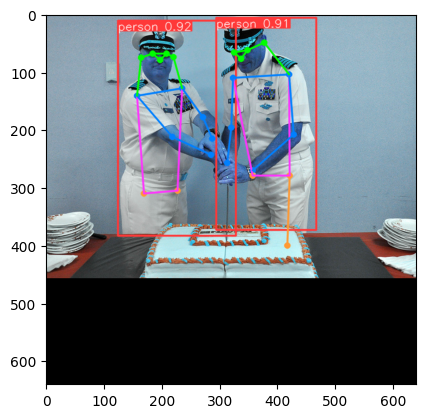

In [ ]:
from ultralytics import YOLO
from PIL import Image

model = YOLO('yolov8n-pose.pt')

for i ,(X, y) in enumerate(train_loader):
  if i == 1:
    input = X[4].permute(2,0,1)
    input = input.reshape(1, input.shape[0], input.shape[1], input.shape[2])
    results = model(input)

    for r in results:
        im_array = r.plot()  # plot a BGR numpy array of predictions
        print(im_array.shape)
        im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
        plt.imshow(im)  # show image